In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import pandas as pd
import os
from pathlib import Path
import scipy.signal as signal
import os
from pathlib import Path
import numpy.matlib

In [14]:
def crossspec(x,y,fs,ns = 2**15,N = 0,unitflag = 0):
    '''
    % This program calulates the crossspectral density or spectrum of signals x and y.
    % Hanning windowing is used, with 50% overlap. Per Bendat and Piersol, Section 11.6.3, Gxy 
    % is scaled by the mean-square value of the window for overall amplitude
    % scaling purposes.
    %
    %   call [Gxy,f] = crossspec(x,y,fs,ns,N,unitflag);
    % 
    %   Outputs: 
    %   Gxy = Single-sided cross spectrum or cross spectral density, depending on unitflag
    %   f = frequency array for plotting
    %   OASPL = Overall sound pressure level
    %
    %   Inputs:
        %   x,y = time series data
    %   fs = sampling frequency
    %   ns = number of samples per block.  Default is 2^15 if not specified.
    %   N = total number of samples.  If N is not an integer multiple of ns, 
    %       the samples less than ns in the last block are discarded.  Default   
    %       is nearest lower power of 2 if not specified.
    %   unitflag = 1 for autospectrum, 0 for autospectral density.  Default is
    %   autospectral density

    '''

    if N==0:
        N = 2**int(np.log2(len(x)))

    x = x[0:N]
    y = y[0:N]

    f = fs*(np.arange(0,ns/2)-1)/ns
    df = f[2] - f[1]   


    x = x-np.mean(x)
    y = y-np.mean(y)

    ww = sig.hann(ns)
    W = np.mean(ww*np.conj(ww))

    numBlocks = int(2*N/ns-1)

    range1 = np.arange(0,ns)
    range2 = np.arange(0,numBlocks)
    range2 = np.reshape(range2,(len(range2),1))
    
    repmat1 = np.matlib.repmat(range1,numBlocks,1)
    repmat2 = np.matlib.repmat(ns/2*range2,1,ns)
        
    comb = repmat1 + repmat2
    comb = comb.astype(int)
    
    blockmat = comb
    
    #print(blockmat)
    #print(len(x),x)
    
    blocksx = np.matlib.repmat(ww,numBlocks,1)*x[blockmat]
    blocksy = np.matlib.repmat(ww,numBlocks,1)*y[blockmat]  


    X = np.fft.fft(blocksx,ns,1) 
    Y = np.fft.fft(blocksy,ns,1)

    Xss = X[:,0:int(ns/2)]                
    Yss = Y[:,0:int(ns/2)]


    Scale = 2/ns/fs/W;

    Gxy = Scale*np.mean(np.conj(Xss)*Yss,0)
    #print(len(Gxy))
    
    Gxy = Gxy*df**unitflag;

    return Gxy, f

def autospec(x,fs,ns = 2**15,N = 1,unitflag = 0):
    '''
    This program calulates the autospectral density or autospectrum and the OASPL of a signal.
    Hanning windowing is used, with 50% overlap. Per Bendat and Piersol, Gxx 
    is scaled by the mean-square value of the window to recover the correct OASPL.

   autospec(x,fs,ns,N)
 
   Outputs: 
   Gxx = Single-sided autospectrum or autospectral density, depending on unitflag
   f = frequency array for plotting
   OASPL = Overall sound pressure level

   Inputs:
   x = time series data.
   fs = sampling frequency
   ns = number of samples per block.  Default is 2^15 if not specified.
   N = total number of samples.  If N is not an integer multiple of ns, 
       the samples less than ns in the last block are discarded.  Default   
       is nearest lower power of 2 if not specified.
   unitflag = 1 for autospectrum, 0 for autospectral density.  Default is
   autospectral density

   Authors: Kent Gee, Alan Wall, and Brent Reichman
   Last Modified: 10/8/2016.  Modified code to use pointers to index array
   rather than for loop
    '''
    if N == 1:
        N = 2**(int(np.log2(len(x))))
        #print(N)
    
    x_new = x[0:N]

    f = fs*np.array(range(0,int(ns/2)))/ns
    df = f[1]
    #print(df)
    #print('Length f',len(f))
    x = x-np.mean(x)
    #print(ns)
    ww = signal.hann(ns)
    W = np.mean(ww*np.conj(ww)) 

    numBlocks = int(2*N/ns-1)
    #print('NumBlocks: ',numBlocks)

    range1 = np.arange(0,ns)
    range2 = np.arange(0,numBlocks)
    range2 = np.reshape(range2,(len(range2),1))
    
    repmat1 = np.matlib.repmat(range1,numBlocks,1)
    repmat2 = np.matlib.repmat(ns/2*range2,1,ns)
    
    #print(repmat1.shape,repmat2.shape)
    #print(repmat1,repmat2)
    comb = repmat1 + repmat2
    comb = comb.astype(int)
    blockmat = comb
    #print(blockmat)
    
    blocks = np.matlib.repmat(ww,numBlocks,1)*x[blockmat]
    X = np.fft.fft(blocks,ns,1);
    Xss = X[:,0:int(ns/2)]
    Scale = 2/ns/fs/W
    
    Gxx = Scale*np.mean(np.conj(Xss)*Xss,0)


    Gxx = Gxx*df**unitflag


    OASPL = 20*np.log10(np.sqrt(np.sum(Gxx*df**(1-unitflag)))/2e-5)
    #print(len(Gxx))

    return Gxx, f, OASPL

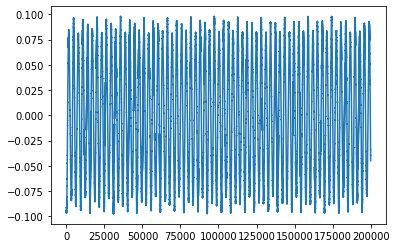

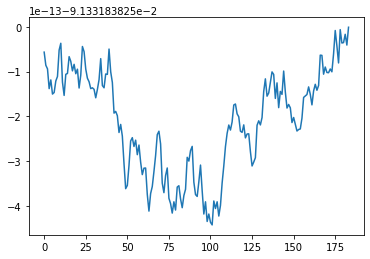

0.02752729999788305 0.0301806193239173 0.011229
0.09633815709907173 0.08894965073457559 0.0891079
[ 8.10551827e-18+0.00000000e+00j  2.41747871e-18+7.47953700e-19j
  3.17408001e-20+1.33287941e-20j -1.62946925e-21-4.63437802e-21j
  5.91406080e-22+1.68569432e-21j  4.32435916e-23-1.08375778e-21j
 -6.55026472e-22+8.82794223e-22j  5.34073355e-23-3.22513717e-22j
  3.64598113e-22-7.82195424e-24j  4.80540102e-23-5.87804028e-23j
  6.82729532e-23-5.64112697e-22j  5.92361426e-24-1.56528481e-22j
  5.30197547e-23+1.17820894e-23j  3.92601450e-23+7.16957080e-23j
 -1.97199067e-22+1.84594898e-22j -2.09348896e-23+1.41484336e-22j
  1.36073714e-22-3.69254679e-22j  1.01473692e-23-6.55896464e-23j
  2.92768714e-23-2.57852387e-23j  1.26185491e-22+1.30005380e-22j
 -1.18070585e-22-1.47969783e-22j -4.80207334e-22-2.23824645e-22j
 -1.76932848e-22-8.29698297e-23j  2.98891833e-23-3.30171133e-23j
  2.04334170e-24-9.37717172e-23j  2.42997559e-23-6.01108179e-22j
 -1.22061148e-22-6.38177823e-22j  3.37665051e-24+4.537215

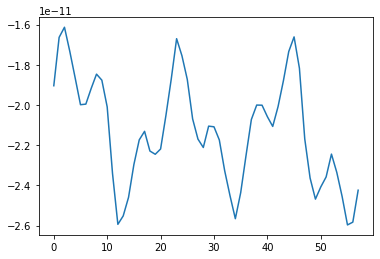

In [27]:
no_p = pd.read_csv('2004PY107_none/series.csv')
yes_p = pd.read_csv('2004PY107/series.csv')

plt.plot(yes_p['h'])
plt.show()
plt.plot(no_p['h'])
plt.show()

sini_1 = np.sqrt(no_p['p']**2+no_p['q']**2)
ecc_1 = np.sqrt(no_p['h']**2+no_p['k']**2)

sini_2 = np.sqrt(yes_p['p']**2+yes_p['q']**2)
ecc_2 = np.sqrt(yes_p['h']**2+yes_p['k']**2)

print(np.mean(sini_1),np.mean(sini_2),0.0112290)
print(np.mean(ecc_1),np.mean(ecc_2),0.0891079)

dt = no_p['t'].to_numpy()[1]
fs = no_p['t'].to_numpy()[-1]/dt
#fs = 1e3
N = len(no_p['p'])
ns = int(fs)

p1 = no_p['p'].to_numpy()
#print(p1)
p2 = yes_p['p'].to_numpy()
q1 = no_p['q'].to_numpy()
q2 = yes_p['q'].to_numpy()
h1 = no_p['h'].to_numpy()
h2 = yes_p['h'].to_numpy()
k1 = no_p['k'].to_numpy()
k2 = yes_p['k'].to_numpy()
#print(crossspec(dirt_1,clean_1,fs,ns,N,unitflag=0))
Gp_ab, f1= crossspec(p1,p2,fs,ns,N)
Gp_aa, f3, OASPL3 = autospec(p1,fs,ns,N,unitflag=0)
Gp_bb, f4, OASPL4 = autospec(p2,fs,ns,N,unitflag=0)

Gq_ab, f1= crossspec(q1,q2,fs,ns,N)
Gq_aa, f3, OASPL3 = autospec(q1,fs,ns,N,unitflag=0)
Gq_bb, f4, OASPL4 = autospec(q2,fs,ns,N,unitflag=0)

Gh_ab, f1= crossspec(h1,h2,fs,ns,N)
Gh_aa, f3, OASPL3 = autospec(h1,fs,ns,N,unitflag=0)
Gh_bb, f4, OASPL4 = autospec(h2,fs,ns,N,unitflag=0)

Gk_ab, f1= crossspec(k1,k2,fs,ns,N)
Gk_aa, f3, OASPL3 = autospec(k1,fs,ns,N,unitflag=0)
Gk_bb, f4, OASPL4 = autospec(k2,fs,ns,N,unitflag=0)

H1_p = np.abs(Gp_ab)/Gp_aa
H1_q = np.abs(Gq_ab)/Gq_aa
H1_h = np.abs(Gh_ab)/Gh_aa
H1_k = np.abs(Gk_ab)/Gk_aa

print(Gp_ab,Gp_bb)
new_p1 = np.fft.irfft(np.fft.rfft(p2,n=len(H1_p)*2-1)/H1_p)
new_q1 = np.fft.irfft(np.fft.rfft(q2,n=len(H1_p)*2-1)/H1_q)
new_h1 = np.fft.irfft(np.fft.rfft(h2,n=len(H1_p)*2-1)/H1_h)
new_k1 = np.fft.irfft(np.fft.rfft(k2,n=len(H1_p)*2-1)/H1_k)

plt.plot(new_h1)

sini_3 = np.sqrt(new_p1**2+new_q1**2)
ecc_3 = np.sqrt(new_h1**2+new_k1**2)
print('New vals: ',np.mean(sini_3),np.mean(ecc_3))